In [1]:
#import dependencies

import pandas as pd
import numpy as np

from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
#read the file
file_to_load = "Resources/sephora_website_dataset.csv"
df=pd.read_csv(file_to_load)
df

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9163,2208502,SEPHORA COLLECTION,Face Masks,The Rose Gold Mask,no size,2.0,15,6200,6.0,6.0,...,True,limited edition · exclusive,no options,What it is: A limited-edition- nurturing and h...,Suggested Usage:-Unfold the mask.-Apply the ma...,-Rose Quartz Extract: Hydrates dry skin. Aqua...,0,1,1,0
9164,2298909,SEPHORA COLLECTION,Lip Sets,Give Me Some Sugar Colorful Gloss Balm Set,3 x 0.32 oz/ 9 g,0.0,0,266,15.0,27.0,...,True,exclusive,no options,What it is: A set of three bestselling Colorfu...,Suggested Usage:-Apply directly to lips using ...,Colorful Gloss Balm Wanderlust: Hydrogenated P...,0,1,0,0
9165,2236750,SEPHORA COLLECTION,Tinted Moisturizer,Weekend Warrior Tone Up Cream,0.946 oz/ 28 mL,0.0,0,445,16.0,16.0,...,True,exclusive,no options,What it is: A weightless complexion booster- i...,Suggested Usage:-Use this product as the last ...,Aqua (Water)- Dimethicone- Isohexadecane- Poly...,0,1,0,0
9166,50,SEPHORA COLLECTION,no category,Gift Card,no size,5.0,46,0,50.0,50.0,...,False,0,no options,What it is:- Available in denominations of $10...,no instructions,unknown,0,0,0,0


In [3]:
df.describe()

,id,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
count,9.168000e+03,9168.000000,9168.000000,9.168000e+03,9168.000000,9168.00000,9168.000000,9168.000000,9168.000000,9168.000000
mean,1.962952e+06,3.990020,282.139180,1.627859e+04,50.063237,51.82359,0.234839,0.264725,0.091841,0.000327
std,3.859714e+05,1.007707,890.642028,4.260651e+04,47.164989,49.45902,0.423921,0.441211,0.288817,0.018087
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000
25%,1.819453e+06,4.000000,10.000000,1.600000e+03,24.000000,25.00000,0.000000,0.000000,0.000000,0.000000
50%,2.072354e+06,4.000000,46.000000,4.800000e+03,35.000000,35.00000,0.000000,0.000000,0.000000,0.000000
75%,2.230591e+06,4.500000,210.000000,1.380000e+04,59.000000,60.00000,0.000000,1.000000,0.000000,0.000000
max,2.359685e+06,5.000000,19000.000000,1.300000e+06,549.000000,549.00000,1.000000,1.000000,1.000000,1.000000


In [4]:
#examine the data types
df.dtypes

id                          int64
brand                      object
category                   object
name                       object
size                       object
rating                    float64
number_of_reviews           int64
love                        int64
price                     float64
value_price               float64
URL                        object
MarketingFlags               bool
MarketingFlags_content     object
options                    object
details                    object
how_to_use                 object
ingredients                object
online_only                 int64
exclusive                   int64
limited_edition             int64
limited_time_offer          int64
dtype: object

In [5]:
#examine the columns
df.columns

Index(['id', 'brand', 'category', 'name', 'size', 'rating',
       'number_of_reviews', 'love', 'price', 'value_price', 'URL',
       'MarketingFlags', 'MarketingFlags_content', 'options', 'details',
       'how_to_use', 'ingredients', 'online_only', 'exclusive',
       'limited_edition', 'limited_time_offer'],
      dtype='object')

In [6]:

df["URL"].nunique()

9168

In [7]:
#any nans?
df.isna().sum().sum()

0

In [8]:
#find duplicate ids
#search for double company id entries
df["id"].nunique()
df["id"].value_counts()

1973841    2
1164805    2
2087047    2
2118982    2
1901859    2
          ..
2016707    1
2340156    1
1758465    1
2321719    1
2152445    1
Name: id, Length: 9115, dtype: int64

In [9]:
#assess the reason for recurring ids
df.loc[df["id"] == 1973841]

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
7044,1973841,SEPHORA COLLECTION,Eye Masks,Eye Mask,1 Pair,4.0,827,57300,5.0,5.0,...,True,exclusive,no options,To redeem your offer: \n1. SELECT FOUR MASKS: ...,Suggested Usage:\n-Remove the protective film ...,Water- Butylene Glycol- Glycerin- Aloe Barb...,0,1,0,0
9011,1973841,SEPHORA COLLECTION,Eye Masks,Eye Mask - Grape - Smoothing,1 Pair,3.5,3,0,5.0,5.0,...,True,exclusive,no options,To redeem your offer: \n1. SELECT FOUR MASKS: ...,Suggested Usage:-Remove the protective film fr...,Water- Butylene Glycol- Glycerin- Aloe Barb...,0,1,0,0


In [10]:
#evaluate quality of column data
print(df["brand"].unique())
df["brand"].nunique()

['Acqua Di Parma' 'AERIN' 'Aether Beauty' 'Algenist' 'Alpha-H'
 'alpyn beauty' 'ALTERNA Haircare' 'amika' 'AMOREPACIFIC'
 'Anastasia Beverly Hills' 'Anthony' 'Antonym' 'Aquis' 'Armani Beauty'
 'The Art of Shaving' 'Artis' 'Artist Couture' 'Atelier Cologne'
 'BALENCIAGA' 'bareMinerals' 'Beachwaver' 'The Beauty Chef' 'BeautyBio'
 'beautyblender' 'BECCA' 'belif' 'Benefit Cosmetics' 'BERDOUES'
 'Bésame Cosmetics' 'Better Not Younger' 'Bio Ionic' 'Biossance'
 'Bite Beauty' 'bkr' 'Black Up' 'Blinc' 'Bobbi Brown' 'boscia' 'Briogeo'
 'Bumble and bumble' 'BURBERRY' 'Buxom' 'BVLGARI' 'By Rosie Jane'
 'Calvin Klein' 'Capri Blue' 'Carolina Herrera' 'Caudalie' 'Cellu-cup'
 'CHANEL' 'Charlotte Tilbury' 'Chloé' 'Christian Louboutin'
 'Christophe Robin' 'Ciaté London' 'Cinema Secrets' 'Clarins'
 'Clarisonic Skincare' 'CLEAN RESERVE' 'CLINIQUE' 'Coal and Canary'
 'Cocofloss' 'Commodity' 'Comptoir Sud Pacifique' 'Conture' 'COOLA'
 'COVER FX' 'Crushed Tonic' 'dae' 'Deborah Lippmann' 'DEREK LAM 10 CROSBY'

324

In [11]:
#evaluate quality of column data
df["brand"].value_counts()

SEPHORA COLLECTION    496
CLINIQUE              234
tarte                 170
TOM FORD              161
Dior                  145
                     ... 
MDSolarSciences         1
Cellu-cup               1
Conture                 1
Cocofloss               1
Taste Beauty            1
Name: brand, Length: 324, dtype: int64

In [12]:
#evaluate quality of column data
print(df["category"].unique())
print(df["category"].nunique())
df["category"].value_counts()

['Fragrance' 'Cologne' 'Perfume' 'Body Mist & Hair Mist'
 'Body Lotions & Body Oils' 'Body Sprays & Deodorant' 'Perfume Gift Sets'
 'no category' 'Rollerballs & Travel Size' 'Lip Balm & Treatment'
 'Lotions & Oils' 'Eye Palettes' 'Highlighter' 'Cheek Palettes' 'Lipstick'
 'Face Serums' 'Moisturizers' 'Value & Gift Sets'
 'Eye Creams & Treatments' 'Face Sunscreen' 'Lip Balms & Treatments'
 'Mini Size' 'Face Masks' 'Face Wash & Cleansers'
 'Decollete & Neck Creams' 'Face Oils' 'Hand Cream & Foot Cream'
 'Face Primer' 'Color Correct' 'Mists & Essences' 'Tinted Moisturizer'
 'Concealer' 'Beauty Supplements' 'Facial Peels' 'Exfoliators'
 'Conditioner' 'Shampoo' 'Hair Styling Products' 'Scalp & Hair Treatments'
 'Hair Masks' 'Hair Spray' 'Hair Oil' 'Hair Primers' 'Dry Shampoo' 'Hair'
 'Hair Thinning & Hair Loss' 'Hair Straighteners & Flat Irons'
 'Hair Dryers' 'Color Care' 'Curling Irons' 'BB & CC Cream' 'Toners'
 'Sheet Masks' 'Skincare' 'Body Sunscreen' 'Eyebrow' 'Mascara'
 'Foundation' 'E

Perfume                      665
Moisturizers                 451
Face Serums                  384
Value & Gift Sets            378
Face Wash & Cleansers        247
                            ... 
Cleansing Brushes              1
Accessories                    1
Body Moisturizers              1
Hair Styling & Treatments      1
Wellness                       1
Name: category, Length: 143, dtype: int64

In [13]:
#evaluate quality of column data
print(df["name"].unique())
print(df["name"].nunique())
df["name"].value_counts()

['Blu Mediterraneo MINIATURE Set' 'Colonia' 'Arancia di Capri' ...
 'Weekend Warrior Tone Up Cream' 'Gift Card' 'Happy Birthday Gift Card']
9106


Blush                                                4
Discovery Set                                        3
Pour Homme                                           3
Face Mask                                            3
Lipstick                                             3
                                                    ..
CARAT FACE                                           1
pores no more® pore refiner primer                   1
Cocoa Woods                                          1
Gentle Comfort Hydrating Cream for Sensitive Skin    1
Peppermint Hair Cleansing Salt Scrub                 1
Name: name, Length: 9106, dtype: int64

In [14]:
#evaluate quality of column data
print(df["size"].unique())
print(df["size"].nunique())
df["size"].value_counts()


['5 x 0.16oz/5mL' '0.7 oz/ 20 mL' '5 oz/ 148 mL' ... '0.53oz/15g'
 '3 x 0.32 oz/ 9 g' '0.946 oz/ 28 mL']
1623


no size                     3161
1.7 oz/ 50 mL                504
1 oz/ 30 mL                  377
3.4 oz/ 100 mL               188
0.5 oz/ 15 mL                176
                            ... 
60 softgels                    1
8 x 0.04 oz/ 1 g               1
0.1 oz/ 4 mL                   1
0.0088 oz/ 0.24 g              1
6 pans x 0.11 oz/ 3.12 g       1
Name: size, Length: 1623, dtype: int64

In [15]:
#evaluate quality of column data
print(df["rating"].unique())
print(df["rating"].nunique())
df["rating"].value_counts()

[4.  4.5 3.5 5.  3.  0.  2.5 2.  1.  1.5]
10


4.5    3527
4.0    2853
3.5    1051
5.0     872
0.0     398
3.0     308
2.5      88
2.0      39
1.0      23
1.5       9
Name: rating, dtype: int64

In [16]:
df["rating"].describe()

count    9168.000000
mean        3.990020
std         1.007707
min         0.000000
25%         4.000000
50%         4.000000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

In [17]:
good_rating = df.loc[df["rating"]>= 4.5]
good_rating

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
5,1417609,Acqua Di Parma,Perfume,Fico di Amalfi,5 oz/ 148 mL,4.5,79,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Floral Scent Type: Fruity Fl...,no instructions,unknown,1,0,0,0
6,1638832,Acqua Di Parma,Perfume,Rosa Nobile,3.4 oz/ 101 mL,4.5,79,5000,210.0,210.0,...,True,online only,"- 0.7 oz, 20 mL Eau de Parfum Spray - 1.7 oz/...",Fragrance Family: Floral\n\nScent Type: Classi...,no instructions,unknown,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9149,1754720,SEPHORA COLLECTION,Brush Sets,Deluxe Charcoal Antibacterial Brush Set,no size,4.5,166,50200,62.0,155.0,...,True,exclusive,no options,What it is:\nA six-piece brush set with bristl...,Suggested Usage:\n-Use Master Cleanse Daily br...,unknown,0,1,0,0
9150,1681071,SEPHORA COLLECTION,Makeup & Travel Cases,Sephora PRO Brush Caddy,10.5 H x 5 W x 5 D,4.5,31,8800,24.0,24.0,...,True,exclusive,no options,What it is:\nA practical and sturdy wipeable c...,no instructions,unknown,0,1,0,0
9151,1258433,SEPHORA COLLECTION,Scrub & Exfoliants,Sugar Body Scrub,6.76 oz / 200mL,4.5,163,3100,17.0,17.0,...,True,exclusive,no options,Which skin type is it good for?✔ Normal✔ Oily✔...,Suggested Usage:-Put a dollop of the body scru...,-Grape Seed Oil: Supports skin and acts as an...,0,1,0,0
9152,1662410,SEPHORA COLLECTION,Face Wash & Cleansers,Supreme Cleansing Oil,6.4 oz/ 190 mL,4.5,357,15800,15.0,15.0,...,True,exclusive,no options,What it is:\nA cleansing oil with the effectiv...,Suggested Usage:\n-Dispense one dose from the ...,-Cottonseed Oil: Nourishes and provides smoot...,0,1,0,0


In [18]:
zero_stars_df = df.loc[df["rating"]==0.0]
zero_stars_df

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
14,2339661,Acqua Di Parma,Perfume,Camelia Eau de Parfum,3.4 oz/ 100 mL,0.0,0,143,275.0,275.0,...,True,online only,- 0.68 oz/ 20 mL Eau de Parfum Spray - 3.4 oz...,Fragrance Family: FloralsScent Type: Fresh Flo...,Suggested Usage:-Fragrance is intensified by t...,unknown,1,0,0,0
26,1775055,Acqua Di Parma,Cologne,Colonia Club,1.7 oz/ 50 mL,0.0,0,259,120.0,120.0,...,True,online only,- 1.7 oz/ 50 mL Eau de Cologne Spray,Colonia Club captures bold masculinity and a m...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
31,2295202,Acqua Di Parma,Perfume Gift Sets,Blu Mediterraneo Arancia di Capri Gift Set,no size,0.0,0,204,113.0,143.0,...,True,limited edition · online only,no options,Fragrance Family: FreshScent Type: Fresh Citru...,Suggested Usage:-Fragrance is intensified by t...,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,1,0
32,2295186,Acqua Di Parma,Perfume Gift Sets,Rosa Nobile Gift Set,no size,0.0,0,235,200.0,279.0,...,True,limited edition · online only,no options,Fragrance Family: Floral\n\nScent Type: Classi...,Suggested Usage:-Fragrance is intensified by t...,unknown,1,0,1,0
33,2339703,Acqua Di Parma,Perfume,Sakura Eau de Parfum,3.4 oz/ 100 mL,0.0,0,165,275.0,275.0,...,True,online only,- 0.7 oz/ 20 mL Eau de Parfum Spray - 3.4 oz/...,Fragrance Family: FloralsScent Type: Fruity Fl...,Suggested Usage:-Fragrance is intensified by t...,Alcohol Denat.- Aqua (Water)- Parfum (Fragranc...,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9105,2290096,SEPHORA COLLECTION,Eye Brushes,PRO Shadow Brush #13,no size,0.0,0,400,20.0,20.0,...,True,exclusive,no options,What it is: A flat- slightly tapered-shape bru...,Suggested Usage:-Load brush head with product ...,unknown,0,1,0,0
9108,2232007,SEPHORA COLLECTION,Beauty Supplements,Sephora Collection x OLLY: Mini Glowing Skin,10 Count,0.0,0,692,7.0,7.0,...,True,exclusive,no options,Beauty Benefit: For Hydrated- Youthful Skin Wh...,Suggested Usage:-For best results- chew two gu...,-Hyaluronic Acid: Helps plump- smooth- and mo...,0,1,0,0
9164,2298909,SEPHORA COLLECTION,Lip Sets,Give Me Some Sugar Colorful Gloss Balm Set,3 x 0.32 oz/ 9 g,0.0,0,266,15.0,27.0,...,True,exclusive,no options,What it is: A set of three bestselling Colorfu...,Suggested Usage:-Apply directly to lips using ...,Colorful Gloss Balm Wanderlust: Hydrogenated P...,0,1,0,0
9165,2236750,SEPHORA COLLECTION,Tinted Moisturizer,Weekend Warrior Tone Up Cream,0.946 oz/ 28 mL,0.0,0,445,16.0,16.0,...,True,exclusive,no options,What it is: A weightless complexion booster- i...,Suggested Usage:-Use this product as the last ...,Aqua (Water)- Dimethicone- Isohexadecane- Poly...,0,1,0,0


In [19]:
helpful_stars_df = df.loc[df["rating"] >0.0]
helpful_stars_df.count()
helpful_stars_df

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9160,2149847,SEPHORA COLLECTION,Bath Soaks & Bubble Bath,Fizzing Bath Star Mini - Surprise Flowers,0.53oz/15g,3.5,11,2100,2.0,2.0,...,True,exclusive · online only,no options,What it is: A fizzing star that dissolves int...,Suggested Usage:-Place the fizzing star in the...,Sodium Bicarbonate- Citric Acid- CI 77891 (Tit...,1,1,0,0
9161,1601111,SEPHORA COLLECTION,Brush Sets,Face the Day: Full Face Brush Set,no size,3.5,62,32900,49.0,95.0,...,True,limited edition · exclusive,no options,What it is:\nA six-piece brush set designed to...,no instructions,unknown,0,1,1,0
9162,2149839,SEPHORA COLLECTION,Scrub & Exfoliants,Exfoliating Body Granita Scrub - Surprise Flowers,8.45oz/250mL,3.5,39,6900,8.0,8.0,...,True,exclusive · online only,no options,What it is: An indulgent- yet gentle exfoliat...,Suggested Usage:-Apply to wet skin.-Massage in...,Water- Glycerin- Cellulose Acetate- Sodium Lau...,1,1,0,0
9163,2208502,SEPHORA COLLECTION,Face Masks,The Rose Gold Mask,no size,2.0,15,6200,6.0,6.0,...,True,limited edition · exclusive,no options,What it is: A limited-edition- nurturing and h...,Suggested Usage:-Unfold the mask.-Apply the ma...,-Rose Quartz Extract: Hydrates dry skin. Aqua...,0,1,1,0


In [20]:
#evaluate quality of column data
print(df["number_of_reviews"].nunique())

833


In [21]:
df["number_of_reviews"].describe()

count     9168.000000
mean       282.139180
std        890.642028
min          0.000000
25%         10.000000
50%         46.000000
75%        210.000000
max      19000.000000
Name: number_of_reviews, dtype: float64

In [22]:
#which product has the most reviews
df.loc[df["number_of_reviews"]==19000]

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
519,1922541,bareMinerals,Foundation,Original Loose Powder Mineral Foundation Broad...,0.28 oz,4.5,19000,191700,32.0,32.0,...,False,0,no options,What it is: A buildable foundation- made with ...,Suggested Usage:\n-Use the Beautiful Finish Br...,-Titanium Dioxide and Zinc Oxide: Mineral sun...,0,0,0,0


In [23]:
#how many products have zero "loves"
df.groupby(df["number_of_reviews"] == 0)["URL"].count()


number_of_reviews
False    8771
True      397
Name: URL, dtype: int64

In [24]:
zero_reviews_df=df.loc[df["number_of_reviews"] == 0]
zero_reviews_df

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
14,2339661,Acqua Di Parma,Perfume,Camelia Eau de Parfum,3.4 oz/ 100 mL,0.0,0,143,275.0,275.0,...,True,online only,- 0.68 oz/ 20 mL Eau de Parfum Spray - 3.4 oz...,Fragrance Family: FloralsScent Type: Fresh Flo...,Suggested Usage:-Fragrance is intensified by t...,unknown,1,0,0,0
26,1775055,Acqua Di Parma,Cologne,Colonia Club,1.7 oz/ 50 mL,0.0,0,259,120.0,120.0,...,True,online only,- 1.7 oz/ 50 mL Eau de Cologne Spray,Colonia Club captures bold masculinity and a m...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
31,2295202,Acqua Di Parma,Perfume Gift Sets,Blu Mediterraneo Arancia di Capri Gift Set,no size,0.0,0,204,113.0,143.0,...,True,limited edition · online only,no options,Fragrance Family: FreshScent Type: Fresh Citru...,Suggested Usage:-Fragrance is intensified by t...,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,1,0
32,2295186,Acqua Di Parma,Perfume Gift Sets,Rosa Nobile Gift Set,no size,0.0,0,235,200.0,279.0,...,True,limited edition · online only,no options,Fragrance Family: Floral\n\nScent Type: Classi...,Suggested Usage:-Fragrance is intensified by t...,unknown,1,0,1,0
33,2339703,Acqua Di Parma,Perfume,Sakura Eau de Parfum,3.4 oz/ 100 mL,0.0,0,165,275.0,275.0,...,True,online only,- 0.7 oz/ 20 mL Eau de Parfum Spray - 3.4 oz/...,Fragrance Family: FloralsScent Type: Fruity Fl...,Suggested Usage:-Fragrance is intensified by t...,Alcohol Denat.- Aqua (Water)- Parfum (Fragranc...,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9105,2290096,SEPHORA COLLECTION,Eye Brushes,PRO Shadow Brush #13,no size,0.0,0,400,20.0,20.0,...,True,exclusive,no options,What it is: A flat- slightly tapered-shape bru...,Suggested Usage:-Load brush head with product ...,unknown,0,1,0,0
9108,2232007,SEPHORA COLLECTION,Beauty Supplements,Sephora Collection x OLLY: Mini Glowing Skin,10 Count,0.0,0,692,7.0,7.0,...,True,exclusive,no options,Beauty Benefit: For Hydrated- Youthful Skin Wh...,Suggested Usage:-For best results- chew two gu...,-Hyaluronic Acid: Helps plump- smooth- and mo...,0,1,0,0
9164,2298909,SEPHORA COLLECTION,Lip Sets,Give Me Some Sugar Colorful Gloss Balm Set,3 x 0.32 oz/ 9 g,0.0,0,266,15.0,27.0,...,True,exclusive,no options,What it is: A set of three bestselling Colorfu...,Suggested Usage:-Apply directly to lips using ...,Colorful Gloss Balm Wanderlust: Hydrogenated P...,0,1,0,0
9165,2236750,SEPHORA COLLECTION,Tinted Moisturizer,Weekend Warrior Tone Up Cream,0.946 oz/ 28 mL,0.0,0,445,16.0,16.0,...,True,exclusive,no options,What it is: A weightless complexion booster- i...,Suggested Usage:-Use this product as the last ...,Aqua (Water)- Dimethicone- Isohexadecane- Poly...,0,1,0,0


In [25]:
zero_reviews_df.loc[df["online_only"]==1]

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
14,2339661,Acqua Di Parma,Perfume,Camelia Eau de Parfum,3.4 oz/ 100 mL,0.0,0,143,275.0,275.0,...,True,online only,- 0.68 oz/ 20 mL Eau de Parfum Spray - 3.4 oz...,Fragrance Family: FloralsScent Type: Fresh Flo...,Suggested Usage:-Fragrance is intensified by t...,unknown,1,0,0,0
26,1775055,Acqua Di Parma,Cologne,Colonia Club,1.7 oz/ 50 mL,0.0,0,259,120.0,120.0,...,True,online only,- 1.7 oz/ 50 mL Eau de Cologne Spray,Colonia Club captures bold masculinity and a m...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
31,2295202,Acqua Di Parma,Perfume Gift Sets,Blu Mediterraneo Arancia di Capri Gift Set,no size,0.0,0,204,113.0,143.0,...,True,limited edition · online only,no options,Fragrance Family: FreshScent Type: Fresh Citru...,Suggested Usage:-Fragrance is intensified by t...,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,1,0
32,2295186,Acqua Di Parma,Perfume Gift Sets,Rosa Nobile Gift Set,no size,0.0,0,235,200.0,279.0,...,True,limited edition · online only,no options,Fragrance Family: Floral\n\nScent Type: Classi...,Suggested Usage:-Fragrance is intensified by t...,unknown,1,0,1,0
33,2339703,Acqua Di Parma,Perfume,Sakura Eau de Parfum,3.4 oz/ 100 mL,0.0,0,165,275.0,275.0,...,True,online only,- 0.7 oz/ 20 mL Eau de Parfum Spray - 3.4 oz/...,Fragrance Family: FloralsScent Type: Fruity Fl...,Suggested Usage:-Fragrance is intensified by t...,Alcohol Denat.- Aqua (Water)- Parfum (Fragranc...,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8946,2320679,Yves Saint Laurent,Face Serums,Pure Shots Light Up Brightening Serum Refill,1 oz/ 30 mL,0.0,0,72,70.0,70.0,...,True,online only,no options,What it is: An environmentally-conscious refi...,Suggested Usage:-To release the refill from th...,-Vitamin Cg: Helps to reduce the look of yello...,1,0,0,0
8947,2320646,Yves Saint Laurent,Face Serums,Pure Shots Y Shape Firming Serum Refill,1 oz/ 30 mL,0.0,0,45,70.0,70.0,...,True,online only,no options,What it is: An environmentally-conscious refi...,Suggested Usage:-To release the refill from th...,-100-Percent Pure Firming Peptide: Helps visib...,1,0,0,0
8966,2321461,8Greens,Beauty Supplements,8Greens Skin Tablet,10 Tablet,0.0,0,488,16.0,16.0,...,True,online only,no options,Beauty Benefit: Hydrated and Healthy Skin- Na...,Suggested Usage:-Drop one tablet in eight ounc...,-Biotin: Converts food into energy and promot...,1,0,0,0
9042,2279982,SEPHORA COLLECTION,Facial Cleansing Brushes,Total Coverage Sponge: Cleansing Sponge,no size,0.0,0,529,14.0,14.0,...,True,exclusive · online only,no options,What it is: A facial-cleansing and exfoliating...,Suggested Usage:-Soak sponge in warm water. -F...,unknown,1,1,0,0


In [26]:
zero_reviews_df.groupby("brand")["brand"].count().sort_values(ascending=False)

brand
SEPHORA COLLECTION    31
CLINIQUE              15
NEST New York         12
Virtue                11
Living Proof          10
                      ..
Kosas                  1
Kate Somerville        1
KVD Vegan Beauty       1
KEVYN AUCOIN           1
tarte                  1
Name: brand, Length: 132, dtype: int64

In [27]:
helpful_reviews_df=df.loc[df["number_of_reviews"] > 0]
helpful_reviews_df

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9160,2149847,SEPHORA COLLECTION,Bath Soaks & Bubble Bath,Fizzing Bath Star Mini - Surprise Flowers,0.53oz/15g,3.5,11,2100,2.0,2.0,...,True,exclusive · online only,no options,What it is: A fizzing star that dissolves int...,Suggested Usage:-Place the fizzing star in the...,Sodium Bicarbonate- Citric Acid- CI 77891 (Tit...,1,1,0,0
9161,1601111,SEPHORA COLLECTION,Brush Sets,Face the Day: Full Face Brush Set,no size,3.5,62,32900,49.0,95.0,...,True,limited edition · exclusive,no options,What it is:\nA six-piece brush set designed to...,no instructions,unknown,0,1,1,0
9162,2149839,SEPHORA COLLECTION,Scrub & Exfoliants,Exfoliating Body Granita Scrub - Surprise Flowers,8.45oz/250mL,3.5,39,6900,8.0,8.0,...,True,exclusive · online only,no options,What it is: An indulgent- yet gentle exfoliat...,Suggested Usage:-Apply to wet skin.-Massage in...,Water- Glycerin- Cellulose Acetate- Sodium Lau...,1,1,0,0
9163,2208502,SEPHORA COLLECTION,Face Masks,The Rose Gold Mask,no size,2.0,15,6200,6.0,6.0,...,True,limited edition · exclusive,no options,What it is: A limited-edition- nurturing and h...,Suggested Usage:-Unfold the mask.-Apply the ma...,-Rose Quartz Extract: Hydrates dry skin. Aqua...,0,1,1,0


In [28]:
helpful_stars_df.equals(helpful_reviews_df)

False

In [29]:
helpful_df=helpful_reviews_df
helpful_df

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9160,2149847,SEPHORA COLLECTION,Bath Soaks & Bubble Bath,Fizzing Bath Star Mini - Surprise Flowers,0.53oz/15g,3.5,11,2100,2.0,2.0,...,True,exclusive · online only,no options,What it is: A fizzing star that dissolves int...,Suggested Usage:-Place the fizzing star in the...,Sodium Bicarbonate- Citric Acid- CI 77891 (Tit...,1,1,0,0
9161,1601111,SEPHORA COLLECTION,Brush Sets,Face the Day: Full Face Brush Set,no size,3.5,62,32900,49.0,95.0,...,True,limited edition · exclusive,no options,What it is:\nA six-piece brush set designed to...,no instructions,unknown,0,1,1,0
9162,2149839,SEPHORA COLLECTION,Scrub & Exfoliants,Exfoliating Body Granita Scrub - Surprise Flowers,8.45oz/250mL,3.5,39,6900,8.0,8.0,...,True,exclusive · online only,no options,What it is: An indulgent- yet gentle exfoliat...,Suggested Usage:-Apply to wet skin.-Massage in...,Water- Glycerin- Cellulose Acetate- Sodium Lau...,1,1,0,0
9163,2208502,SEPHORA COLLECTION,Face Masks,The Rose Gold Mask,no size,2.0,15,6200,6.0,6.0,...,True,limited edition · exclusive,no options,What it is: A limited-edition- nurturing and h...,Suggested Usage:-Unfold the mask.-Apply the ma...,-Rose Quartz Extract: Hydrates dry skin. Aqua...,0,1,1,0


In [30]:

print(helpful_df["love"].nunique())
print(helpful_df["love"].min())
print(helpful_df["love"].max())
print(helpful_df["love"].mean())
print(helpful_df["love"].median())

1556
0
1300000
16989.295063276706
5200.0


In [31]:
#which product has the most "loves"
helpful_df.loc[helpful_df["love"] ==1300000]

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
4602,1890623,KVD Vegan Beauty,Lipstick,Everlasting Liquid Lipstick,0.22 oz/ 6.6 mL,4.5,14000,1300000,21.0,21.0,...,True,exclusive,no options,What it is: A long-wear- high-pigment liquid l...,Suggested Usage:-For precise definition- line ...,Isododecane- Caprylic/Capric Triglyceride- Dis...,0,1,0,0


In [32]:
#how many products have zero "loves"
helpful_df.groupby(df["love"] == 0)["id"].count()


love
False    8617
True      154
Name: id, dtype: int64

In [33]:
zero_love_df=helpful_df.loc[helpful_df["love"] == 0]
zero_love_df.groupby("brand")["brand"].count().sort_values(ascending=False)

brand
SEPHORA COLLECTION    33
Fresh                  9
Dr. Jart+              8
TOCCA                  8
Dior                   7
                      ..
Moon Juice             1
Moroccanoil            1
NEST New York          1
NUDESTIX               1
LANEIGE                1
Name: brand, Length: 61, dtype: int64

In [34]:
print(helpful_df["price"].nunique())
helpful_df["price"].describe()


281


count    8771.000000
mean       49.818887
std        46.874878
min         2.000000
25%        24.000000
50%        35.000000
75%        58.000000
max       549.000000
Name: price, dtype: float64

In [35]:
print(helpful_df["value_price"].nunique())
helpful_df["value_price"].describe()

315


count    8771.000000
mean       51.332729
std        48.933925
min         2.000000
25%        25.000000
50%        35.000000
75%        60.000000
max       549.000000
Name: value_price, dtype: float64

In [36]:
helpful_df["options"].nunique()
helpful_df["options"].value_counts()

no options                                                                                                                                                          8005
 - 1.7 oz/ 50 mL Eau de Parfum Spray                                                                                                                                  16
 - 1.7 oz/ 50 mL Eau de Parfum Spray  - 3.4 oz/ 100 mL Eau de Parfum Spray                                                                                            14
 - 1.0 oz/ 30 mL  Spray - 3.4 oz/ 100 mL  Spray                                                                                                                       13
 - 0.34 oz/ 10 mL Eau de Parfum Travel Spray                                                                                                                          11
                                                                                                                                                           

In [37]:

print(helpful_df["details"].nunique())


8479


In [38]:
print(helpful_df["online_only"].unique())
print(helpful_df["online_only"].nunique())
helpful_df["online_only"].value_counts()

[1 0]
2


0    6818
1    1953
Name: online_only, dtype: int64

In [39]:
#1 == exclusive to Sephora
print(helpful_df["exclusive"].unique())
print(helpful_df["exclusive"].nunique())
helpful_df["exclusive"].value_counts()

[0 1]
2


0    6450
1    2321
Name: exclusive, dtype: int64

In [40]:
print(helpful_df["limited_edition"].unique())
print(helpful_df["limited_edition"].nunique())
helpful_df["limited_edition"].value_counts()

[0 1]
2


0    8049
1     722
Name: limited_edition, dtype: int64

In [41]:
#Which
helpful_df["MarketingFlags"].value_counts()

False    4688
True     4083
Name: MarketingFlags, dtype: int64

In [42]:
print(helpful_df["MarketingFlags_content"].unique())
print(helpful_df["MarketingFlags_content"].nunique())
helpful_df["MarketingFlags_content"].value_counts()

['online only' 'exclusive · online only' '0'
 'limited edition · exclusive · online only'
 'limited edition · online only' 'exclusive' 'limited edition · exclusive'
 'limited edition' 'limited time offer'
 'limited time offer · limited edition · exclusive']
10


0                                                   4688
exclusive                                           1638
online only                                         1422
exclusive · online only                              299
limited edition · exclusive                          277
limited edition                                      212
limited edition · online only                        126
limited edition · exclusive · online only            106
limited time offer                                     2
limited time offer · limited edition · exclusive       1
Name: MarketingFlags_content, dtype: int64

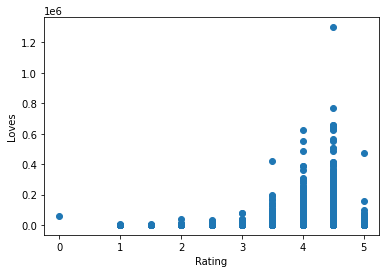

In [45]:
plt.scatter(helpful_df.rating, helpful_df.love)
plt.xlabel('Rating')
plt.ylabel('Loves')
plt.show()

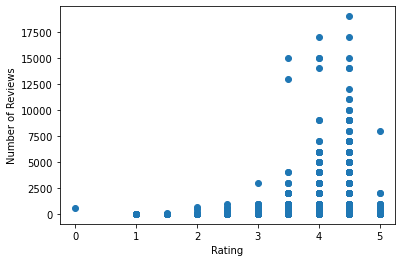

In [46]:
plt.scatter(helpful_df.rating, helpful_df.number_of_reviews)
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

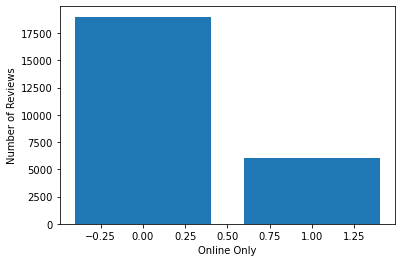

In [48]:
plt.bar(helpful_df.online_only, helpful_df.number_of_reviews)
plt.xlabel('Online Only')
plt.ylabel('Number of Reviews')
plt.show()

In [43]:
helpful_reviews_df.to_csv("beauty_habits_clean.csv")